In [1]:
import numpy as np
import scipy as sp
from scipy import integrate
from scipy import ndimage
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import figure, rc, ticker
%matplotlib inline

In [2]:
# This takes a list of dos and returns the #electrons occupied and empty states
#Input energy range can already be normalized with respect to the fermi level
def dos_sum(energies,dos,fermi=0,cutoff=0):
    #cutoff is defined relative to the fermi level
    end = energies[-1]
    if cutoff != 0:
        end = fermi + cutoff
    j=0
    k=0
    for i in range(0,len(dos)):
        if energies[i] < fermi:
            j=j+1
            k=k+1
        elif energies[i] < end:
            k = k+1
        #if dos[i] < 0:
        #    dos[i] = 0
    occupied=integrate.cumtrapz(dos[0:j],energies[0:j]) # for two columns use 0:j,1 and for 4 columns use [0:j,3]
    empty=integrate.cumtrapz(dos[j:k],energies[j:k])
    return occupied[-1], empty[-1]

In [3]:
def dos_from_file(fname, SOC=False):  #Normalizes DOS to the fermi level because of reasons!
    np.set_printoptions(formatter={'float': lambda x:"%.16f" %x})
    f = open(fname, 'r')
    natoms = int(f.readline().split()[0])  #read the total number of atoms form 1st line
    print ('Natoms=',natoms)
    # skip next 4 lines
    for i in range(4): 
        line =f.readline() 
    s = f.readline().split() # read 6th line
    emin = s[0]
    emax = s[1]
    nedos = int(s[2])
    fermi = float(s[3])  #emax = f.readline().split()[1]
    print ('E_Fermi=',fermi)
    print ('NEDOS=',nedos)
    # Read total dos
    if SOC == False:
        tdos = np.zeros([nedos,5])
        atomdos = np.zeros([natoms,nedos,33])
    else: 
        tdos = np.zeros([nedos,3])
        atomdos = np.zeros([natoms, nedos, 65])
    for i in range(nedos):
        tdos[i] = f.readline().split()
    #print tdos[0:5,:]
    # Read atom dos


    for i in range(natoms):
        line =f.readline() #skip the header line for each atom dos
        for j in range(nedos):
            if SOC == False:
                atomdos[i,j] = f.readline().split()
            else:
                atomdos[i,j,0:37] = f.readline().split()
                atomdos[i,j,37:] = f.readline().split()
        atomdos[i,:,0] = atomdos[i,:,0] - fermi
    tdos = tdos - fermi
    #print len(atomdos), atomdos[0,3000,:]
    print('Done with ' + fname)
    f.close()
    return natoms, fermi, nedos, tdos, atomdos


In [4]:
for_DOS = dos_from_file(str('C:/Users/Steven/Documents/DOS/YBCO/331_1Ba_DOSCAR'))
back_DOS = dos_from_file(str('C:/Users/Steven/Documents/DOS/YBCO/331_pristine_DOSCAR'))


Natoms= 116
E_Fermi= 3.65979226
NEDOS= 5000
Done with C:/Users/Steven/Documents/DOS/YBCO/331_1Ba_DOSCAR
Natoms= 117
E_Fermi= 3.55136734
NEDOS= 6250
Done with C:/Users/Steven/Documents/DOS/YBCO/331_pristine_DOSCAR


In [21]:
dos_dir = 'C:/Users/Steven/Documents/DOS/YBCO/1Ba_strain_fix/'
cn6_dos = dos_from_file(dos_dir + 'DOSCAR_cn6')
#cn4_dos = dos_from_file(dos_dir + 'DOSCAR_cn4')
#cn2_dos = dos_from_file(dos_dir + 'DOSCAR_cn2')
c0_dos = dos_from_file(dos_dir + 'DOSCAR_0')
#c2_dos = dos_from_file(dos_dir + 'DOSCAR_c2')
#c4_dos = dos_from_file(dos_dir + 'DOSCAR_c4')
c6_dos = dos_from_file(dos_dir + 'DOSCAR_c6')
#dos_strain = [cn6_dos, cn4_dos, cn2_dos, c0_dos, c2_dos, c4_dos, c6_dos]

Natoms= 116
E_Fermi= 3.93976994
NEDOS= 5000
Done with C:/Users/Steven/Documents/DOS/YBCO/1Ba_strain_fix/DOSCAR_cn6
Natoms= 116
E_Fermi= 3.65971744
NEDOS= 5000
Done with C:/Users/Steven/Documents/DOS/YBCO/1Ba_strain_fix/DOSCAR_0
Natoms= 116
E_Fermi= 3.39108405
NEDOS= 5000
Done with C:/Users/Steven/Documents/DOS/YBCO/1Ba_strain_fix/DOSCAR_c6


In [4]:
dos_dir = 'C:/Users/Steven/Documents/DOS/YBCO/mode_32/mode_32/'
dos_1 = dos_from_file(dos_dir + 'DOSCAR_n20')
dos_2 = dos_from_file(dos_dir + 'DOSCAR_n10')
dos_3 = dos_from_file(dos_dir + 'DOSCAR_0')
dos_4 = dos_from_file(dos_dir + 'DOSCAR_10')
dos_5 = dos_from_file(dos_dir + 'DOSCAR_20')

dos_6 = dos_from_file('C:/Users/Steven/Documents/DOS/YBCO/331_1Ba_DOSCAR')

buckle_dos=[dos_1,dos_2,dos_3,dos_4,dos_5, dos_6]

Natoms= 117
E_Fermi= 3.70503403
NEDOS= 5000
Done with C:/Users/Steven/Documents/DOS/YBCO/mode_32/mode_32/DOSCAR_n20
Natoms= 117
E_Fermi= 3.58322048
NEDOS= 5000
Done with C:/Users/Steven/Documents/DOS/YBCO/mode_32/mode_32/DOSCAR_n10
Natoms= 117
E_Fermi= 3.54237803
NEDOS= 5000
Done with C:/Users/Steven/Documents/DOS/YBCO/mode_32/mode_32/DOSCAR_0
Natoms= 117
E_Fermi= 3.57996817
NEDOS= 5000
Done with C:/Users/Steven/Documents/DOS/YBCO/mode_32/mode_32/DOSCAR_10
Natoms= 117
E_Fermi= 3.67161717
NEDOS= 5000
Done with C:/Users/Steven/Documents/DOS/YBCO/mode_32/mode_32/DOSCAR_20
Natoms= 116
E_Fermi= 3.65979226
NEDOS= 5000
Done with C:/Users/Steven/Documents/DOS/YBCO/331_1Ba_DOSCAR


In [5]:
def dos_analyze(DOS_tuple,nEach, SOC=False):    #nEach is number of each atom, get it from POSCAR
    #You could choose to define your own atomic species, such as dividing between spin-up and spin-down
    #Fe atoms, but it would only work if all of one sub-species were prior to the other sub-species in POSCAR
    #---------- The following code is used analyze the DOS -------------
    #---------- This is for non-spin polarized calculations and spin polarized version will be made later -------------

    ### set up the DOS files for interested atoms

    ## the number of atom types in the DOSCAR
    nedos = DOS_tuple[2]
    dosEnerg = np.zeros([nedos,1])   #This is the energy values, which would be the x-coordinate of the DOS graph
    dos2 = np.zeros([nedos,len(nEach),8])  #Orbital-type projected, spin-polarized DOS summed across each atom type
    total_proj = np.zeros([nedos,10])  #Spin-polarized, the LAST two columns are the total DOS summed across all orbitals

    atomi = []
    count = 0
    ## choose specific atoms that you want to plot DOS and input them in the "atomi" list
    for i in range(0,len(nEach)):
        atomi.append(list(range(count,count+nEach[i])))
        count = np.add(count, nEach[i])
        
    ## get the corrected energy with respect to fermi level, E-E_F
    for j in range(nedos):
        dosEnerg[j]= np.subtract(DOS_tuple[4][1,j,0], DOS_tuple[1])  ## note: the first value in atomdos can be any of the atomic number in the "atomi_1" list

    ### sum up the projected DOS, i.e. s, p, and d orbitals for all interested atoms

    #note that DOS_tuple[4] = atomdos with dimensions natoms, nedos, spin-polarized orbital types (33)
    if SOC == False:
        orbitals = np.array([1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32])
        mult = np.array([1,3,5,7,1,3,5,7])
    else:
        orbitals = np.array([1,5,9,13,17,21,25,29,33,37,41,45,49,53,57,61])
        mult = np.array([1,3,5,7])
    
    for i in range(nedos):    
        for j in range(0,len(nEach)):
            orbCount = 0
            if SOC == False:
                numOrbs = 8
            else:
                numOrbs = 4
            for k in range(0,numOrbs):
                for l in range(0,mult[k]):
                    dos2[i,j,k] = np.add(dos2[i,j,k], np.sum(DOS_tuple[4][atomi[j],i,orbitals[orbCount]]))
                    orbCount = orbCount + 1

        
    ### summation of s, d, p orbitals for all atoms and total DOS
    for i in range(nedos):
        for j in range(0,numOrbs): #orbital quantum number, spin-polarized s up, p up . . .
            total_proj[i,j]=np.sum(dos2[i,:,j])  #colon sums across all atom types
        total_proj[i,8]=np.sum(total_proj[i,0:4])
        if SOC == False:
            total_proj[i,9]=np.sum(total_proj[i,4:8])
    return dosEnerg, dos2, #total_proj
    
for_proc = dos_analyze(for_DOS,[6,6,6,12])
#back_proc = dos_analyze(back_DOS,[4,8,4,20,4])
atom_list_temp = [9,27,62,18]
#atom_list_temp = [1,3,7,2]
#cn6_proc = dos_analyze(cn6_dos,atom_list_temp)
#cn4_proc = dos_analyze(cn4_dos,atom_list_temp)
#cn2_proc = dos_analyze(cn2_dos,atom_list_temp)
#zero_proc = dos_analyze(zero_dos,atom_list_temp)
#c2_proc = dos_analyze(c2_dos,atom_list_temp)
#c4_proc = dos_analyze(c4_dos,atom_list_temp)
#c6_proc = dos_analyze(c6_dos,atom_list_temp)
#proc_buckle = [dos_analyze(dos,atom_list_temp) for dos in buckle_dos]

print('Done')


Done


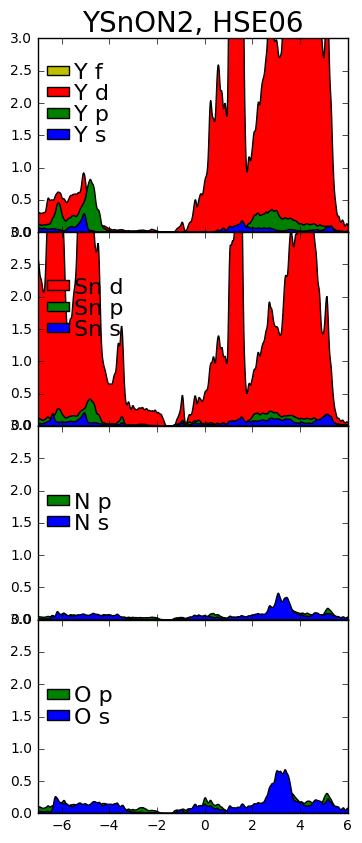

In [6]:
#------------ Plot the DOS of each atom ------------------


def plot_all_pdos(proc_tuple, num_atoms,title,
        label_list=[['Y s','Y p','Y d'],['Y s','Y p','Y d'],['Cu s','Cu p', 'Cu d'],['Cu s','Cu p', 'Cu d'],
        ['O s','O p'],['O s','O p'],['Ba s','Ba p', 'Ba d'],['Ba s','Ba p', 'Ba d']],
        color_list=['b','g','r','y'], norm_factor = 1, spin_polar = 2):  #proc_tuple is output of dos_analyze
    #norm factor is for normalizing to number of formula units
    plt.close()
    fig,axarr = plt.subplots(num_atoms*spin_polar,1, sharex=True)
    fig.set_size_inches(4*spin_polar,10,forward=True)
    for i in range(0,spin_polar*num_atoms):  #The sub-plots, doubled because spin polarization
        for j in range(len(label_list[i])-1,-1,-1): #orbital types, label_list determines how many orbitals we plot
            if (i%2 == 0 and spin_polar == 2) or spin_polar == 1:
                axarr[i].set_ylim([0,3])
                axarr[i].fill(proc_tuple[0], sp.ndimage.filters.gaussian_filter1d(proc_tuple[1][:,i//spin_polar,j]/norm_factor,1),facecolor=color_list[j],label=label_list[i][j])
            elif spin_polar == 2:
                axarr[i].set_ylim([-3,0])
                axarr[i].fill(proc_tuple[0], -sp.ndimage.filters.gaussian_filter1d(proc_tuple[1][:,i//2,j+4]/norm_factor,1),facecolor=color_list[j],label=label_list[i][j])
        axarr[i].set_xlim([-7,6])
        if i%2 == 0 or spin_polar == 1:
            axarr[i].legend(loc = (0,0.4), prop=dict(size=16), frameon=False,framealpha=0.35,handlelength=1., handleheight=0.3,labelspacing=0.05,handletextpad=0.25)
   

            
    fig.subplots_adjust(hspace=0)
    axarr[0].set_title(title,fontsize=20) 
    #plt.savefig(path + '332_1Cu_atomDOS', bbox_inches='tight', figsize=(10,8), dpi=200)
    matplotlib.rc('xtick', labelsize=20) 
    matplotlib.rc('ytick', labelsize=20) 
    plt.show()

plot_all_pdos(for_proc, 4, 'YSnON2, HSE06', label_list = [['Y s', 'Y p', 'Y d', 'Y f'],
['Sn s', 'Sn p', 'Sn d'],['N s', 'N p'],['O s', 'O p']], spin_polar = 1)
#plot_all_pdos(back_proc,5,'Projected DOS of 331_1Ba', norm_factor = 4,label_list=[['Ba s','Ba p','Ba d'],['Ba s','Ba p','Ba d'],['Mn s','Mn p', 'Mn d'],['Mn s','Mn p', 'Mn d'],
#        ['Y s','Y p'],['Y s','Y p'],['O s','O p'],['O s','O p'],['F s','F p'],['F s','F p']])



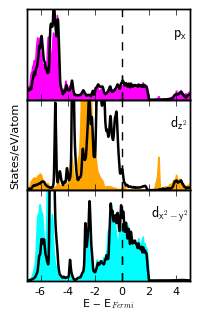

In [10]:
#---------- This part further extract projected DOS from interested atoms and plots them separately -------------
# the DOS_tuple argument is (natoms, fermi, nedos, tdos, atomdos) and is the output of dos_from_file
# the atomdos argument has dimensions [natoms,nedos,33] and holds all 32 spin-polarized orbitals, with the energy of the
#states (the x-axis of the plot) in [0,:,0]

def orb_smear(DOS_tuple, atom, orb, smear, spin = 1,norm_factor=1,cutoff=0): #returns the smeared DOS array of a single orbital of a single atom
    # as the first argument, and the occupied/unoccupied integrals as second
    smeared_DOS = np.multiply(spin/norm_factor,sp.ndimage.filters.gaussian_filter1d(DOS_tuple[4][atom-1,:,orb],smear))
    integrals = dos_sum(DOS_tuple[4][0,:,0],np.transpose(DOS_tuple[4][atom-1,:,orb]),cutoff=cutoff)
    return [(DOS_tuple[4][0,i,0],smeared_DOS[i]) for i in range(len(smeared_DOS))], integrals

#fermi_conv takes a DOS and energy range and convolutes it with the Fermi-dirac
#electron distribution, so that states are weighted by their probability of being occupied.
#fermi = 0 if e_range is already normalized
#e_range is in eV
def fermi_conv(dos, e_range, fermi=0, temp=298):
    return [dos[i]/(1 + np.exp((e_range[i] - fermi)/(.00008617 * temp)))
        for i in range(len(dos))]


def dos_plot(plots_list, fig_dict, ax_dict): #Takes a list of individual subplots.  Each subplot is a list of orbitals to be plotted
    #on that subplot.  each orbital is dict with keys dos_tuple, atom, orbital, smear, label, plot_type, style(a dict)
    dos_fig = plt.subplots(nrows=len(plots_list), **fig_dict)
    sub_count = 0
    for plot_list in plots_list:
        plot_one_orb(dos_fig[1][sub_count], plot_list[0], ax_dict)
        if len(plot_list) > 1:  #if we plot multiple orbitals in same subplot
            for i in range (1,len(plot_list)):
                plot_one_orb(dos_fig[1][sub_count], plot_list[i], ax_dict, first=False)
        sub_count = sub_count + 1
    dos_fig[1][1].set_ylabel('States/eV/atom', fontsize=8)
    plt.show()
    return dos_fig

    
def plot_one_orb(sub_axis, plot_dict, ax_dict, first=True):
    smeared_orb = orb_smear(plot_dict['DOS_tuple'], plot_dict['atom'], plot_dict['orb'], plot_dict['smear'])[0]
    if first:
        sub_axis.text(0.7 + plot_dict['offset'], 0.7, plot_dict['label'], fontsize=10, transform=sub_axis.transAxes)
        sub_axis.set_xticks([x for x in range(ax_dict['xlim'][0], ax_dict['xlim'][1]) if x % 2 == 0])
        sub_axis.set_xticklabels(sub_axis.get_xticks(), fontsize=8)
        sub_axis.set_xlabel(r'E $\minus$ E$_{Fermi}$', fontsize=8, labelpad=0.02)
        sub_axis.set_yticks([])
        #sub_axis.set_yticks([x for x in np.linspace(0,5, num=51) if x >= ax_dict['ylim'][0] and x <= ax_dict['ylim'][1]])
    else:
        yrange = sub_axis.get_ylim()
        sub_axis = sub_axis.twinx()
        sub_axis.set_ylim(yrange)
        sub_axis.set_yticks([])
        sub_axis.set_zorder(sub_axis.get_zorder() + 1)
        sub_axis.patch.set_visible(False)
    sub_axis.axvline(x=0,ymin=sub_axis.get_ylim()[0], ymax=sub_axis.get_ylim()[1], c='black', linestyle='--')
    if plot_dict['plot_type'] == 'fill':
        sub_axis.fill_between([a[0] for a in smeared_orb], [a[1] for a in smeared_orb], **plot_dict['style'])
    elif plot_dict['plot_type'] == 'line':
        sub_axis.plot([a[0] for a in smeared_orb], [a[1] for a in smeared_orb], **plot_dict['style'])
    sub_axis.set_xlim(ax_dict['xlim'])
    sub_axis.set_ylim(ax_dict['ylim'])
    plt.subplots_adjust(hspace=0)

PRL_4d_fig_params = {
    'dpi': 300,
    'figsize': (2.1,3.5),
    'sharex': True,
#    'tight_layout': True
}
PRL_4d_ax_params = {
    'xlim': (-7,5),
    'ylim': (0,0.3)
}
PRL_4d_prist_stuff = {
    'DOS_tuple': back_DOS,
    'plot_type': 'line',
    'smear': 1,
    'style': {
        'color': 'black',
        'lw': 1.8,
        'linestyle': '-'
    }
}
PRL_4d_vac_stuff = {
    'DOS_tuple': for_DOS,
    'plot_type': 'fill',
    'smear': 1
}
PRL_4d_px_prist = {
    'atom': 40,
    'orb': 7,
}
PRL_4d_px_prist.update(PRL_4d_prist_stuff)
PRL_4d_dz_prist = {
    'atom': 11,
    'orb': 13,
}
PRL_4d_dz_prist.update(PRL_4d_prist_stuff)
PRL_4d_dx2y2_prist = {
    'atom': 11,
    'orb': 17,
}
PRL_4d_dx2y2_prist.update(PRL_4d_prist_stuff)
PRL_4d_px_vac = {
    'atom': 39,
    'label': r'$\mathsf{p_{x}}$',
    'offset': 0.2,
    'orb': 7,
    'style': {
        'color': 'magenta'
    }
}
PRL_4d_px_vac.update(PRL_4d_vac_stuff)
PRL_4d_dz_vac = {
    'atom': 11,
    'label': r'$\mathsf{d_{z^2}}$',
    'offset': 0.18,
    'orb': 13,
    'style': {
        'color': 'orange'
    }
}
PRL_4d_dz_vac.update(PRL_4d_vac_stuff)
PRL_4d_dx2y2_vac = {
    'atom': 11,
    'label': r'$\mathsf{d_{x^2-y^2}}$',
    'offset': 0.06,
    'orb': 17,
    'style': {
        'color': 'cyan'
    }
}
PRL_4d_dx2y2_vac.update(PRL_4d_vac_stuff)
PRL_fig4_orbs = [[PRL_4d_px_vac, PRL_4d_px_prist],[PRL_4d_dz_vac, PRL_4d_dz_prist],[PRL_4d_dx2y2_vac, PRL_4d_dx2y2_prist]]
            
PRL_4d = dos_plot(PRL_fig4_orbs, PRL_4d_fig_params, PRL_4d_ax_params)[0]            
PRL_4d.savefig('C:/Users/Steven/Pictures/YBCO_PRL_figures/figure_4d.png', dpi=300,
    pad_inches=0, format='png')
        
#39 is plane O in the defect structure, but it's 40 in the pristine.  11 is plane copper in both
#xy, yz, z^2, xz, x2-y2


In [7]:
num_subplots = 6

def make_strain_plot(DOS_tuples, atom, orb, smear, spin=1,cutoff=0, xlim=[-8,6],
        ylim=[0,0.3],fill = [[]], dpi=1000):
    strainfig,axes = plt.subplots(num_subplots,1, sharex=True)
    strainfig.set_size_inches(2.5,num_subplots,forward=True)
    axes[0].set_title(r'Plane $dz^{2}$', fontsize=12)
    for i in range(0,num_subplots):
        E_range = np.subtract(DOS_tuples[i][4][0,:,0], DOS_tuples[i][1])
        raw_dos = DOS_tuples[i][4][atom-1,:,orb]
        smear_dos = one_orb_no_plot(DOS_tuples[i],E_range,atom,orb,smear,spin=1,cutoff=cutoff)[0]
        fermi_dos = fermi_conv(raw_dos, E_range, temp=70)
        axes[i].plot(E_range,smear_dos)
        axes[i].set_yticklabels([])
        if i==2:
            axes[i].set_ylabel('PDOS (states/eV/atom)', fontsize=12)
#        axes[i].text(-8,0.2,str(np.round(smear_dos[1][0],decimals=4)))
#        axes[i].text(2,0.2,str(np.round(smear_dos[1][1],decimals=4)))
        fermi_int = integrate.cumtrapz(fermi_dos, E_range)
        fermi_index = np.argmin(abs(E_range))
        print(raw_dos[fermi_index], fermi_int[-1] - fermi_int[fermi_index])  #sum from zero to end
        axes[i].text(4,0.2,str(i + 1),fontsize=12)
        if fill != [[]]:
            axes[i].fill_between(E_range,0,smear_dos[0],where = np.logical_and(E_range > fill[i][0], E_range < fill[i][1]))
    polish_figure(axes,num_subplots,xlim,ylim)
    axes[4].tick_params(axis='both', which='major', labelsize=12)
    axes[4].set_xlabel(r'E $\minus$ E$_{Fermi}$ (eV)', fontsize=12, labelpad=0.1)
    return strainfig

strain_fig = make_strain_plot(buckle_dos,10,17,4,spin=1,cutoff=2, xlim=[-8,6])
strain_fig.subplots_adjust(hspace=0)
plt.savefig('C:/Users/Steven/Pictures/YBCO_natcomm_figures/buckle_dos.pdf', dpi=700,
    pad_inches=0, format='pdf')

NameError: name 'buckle_dos' is not defined